In [1]:
import pennylane as qml
from pennylane import numpy as np
import qiskit

In [15]:
class Converter:
    def __init__(self, qc):
        self.qc = qc

    def convert(self):
        num_qubits = self.qc.num_qubits
        dev = qml.device("default.qubit", wires=num_qubits)
        
        @qml.qnode(dev)
        def circuit(params):
            for instr, qargs, params_qiskit in self.qc.data:
                gate_name = instr.name
                qubit_indices = [qarg.index for qarg in qargs]
                if gate_name == 'h':
                    qml.Hadamard(wires=qubit_indices)
                elif gate_name == 'x':
                    qml.PauliX(wires=qubit_indices)
                elif gate_name == 'y':
                    qml.PauliY(wires=qubit_indices)
                elif gate_name == 'z':
                    qml.PauliZ(wires=qubit_indices)
                elif gate_name == 'cx':
                    qml.CNOT(wires=qubit_indices)
                # Add conditions for other gate types
                elif gate_name == 'rx':
                    angle = instr.params
                    qml.RX(angle, wires=qubit_indices)
                elif gate_name == 'ry':
                    angle = instr.params
                    qml.RY(angle, wires=qubit_indices)
                elif gate_name == 'rz':
                    angle = instr.params
                    qml.RZ(angle, wires=qubit_indices)
            return qml.expval(qml.PauliZ(0))

        return circuit

In [16]:
qc = qiskit.QuantumCircuit(4)
qc.h(0)
qc.h(1)
qc.h(3)
qc.h(2)
qc.rx(0.5, 1)
qc.cx(0,1)

In [17]:
print(qc)

     ┌───┐                
q_0: ┤ H ├─────────────■──
     ├───┤┌─────────┐┌─┴─┐
q_1: ┤ H ├┤ Rx(0.5) ├┤ X ├
     ├───┤└─────────┘└───┘
q_2: ┤ H ├────────────────
     ├───┤                
q_3: ┤ H ├────────────────
     └───┘                


In [18]:
converter = Converter(qc=qc)

In [19]:
qnode = converter.convert()

In [20]:
qnode

<QNode: wires=4, device='default.qubit', interface='auto', diff_method='best'>

/var/folders/m0/98wc8z1s20g0f2k4zvkn7ypr0000gn/T/ipykernel_10555/2720746945.py:13: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  qubit_indices = [qarg.index for qarg in qargs]


(<Figure size 600x500 with 1 Axes>, <Axes: >)

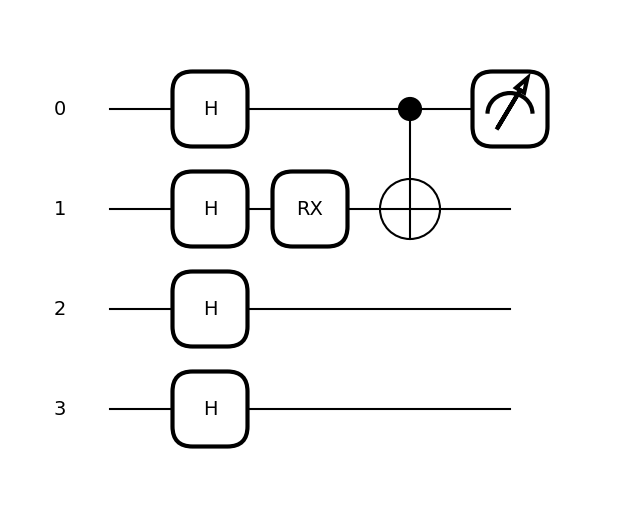

In [25]:
# Expected Output
params = np.array([0.5])
qml.drawer.use_style("default")
qml.draw_mpl(qnode)(params) 